# STQD6324

# Assignment 2

# Introduction

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The 2009 ASA Statistical Computing and Graphics Data Expo consisted of flight arrival and departure details for all commercial flights on major carriers within the USA, from October 1987 to April 2008. This is a large dataset containing nearly 120 million records in total.

The aim of the data expo is to provide a graphical summary of important features of the data set. This is intentionally vague in order to allow different entries to focus on different aspects of the data, but here are a few ideas to get you started:
•When is the best time of day, day of the week, and time of year to fly to minimise delays?
•Do older planes suffer more delays?
•How well does weather predict plane delays?
•How does the number of people flying between different locations change over time?
•Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?
•Use the available variables to construct a model that predicts delays.

For this data exploratory, we will use the data for year 2007. The dataset is too large and need some extra step before any analysis to be done.

## About the dataset

The dataset for this topis is acquired from kaggle website. The data used is the flight data from data expo 2009 focusing on year 2007. The dataset can be downloaded from this url: https://tinyurl.com/rvsmn52t. The dataset consist of 29 columns with size of 702.99 MB. The feature description of the variables are as follows:

|    Feature           |   Description     |
|:--------------------:|:-----------------:|
|   Year               |      Year         |
|   Month              |      1 - 12       |
|   DayofMonth         |      1 - 31       |
|   DayOfWeek          | 1 (Monday) - 7 (Sunday)                |
|   DepTime            | Actual departure time (local, hhmm)                  |
|   CRSDepTime         | Scheduled departure time (local, hhmm)                  |
|   ArrTime            |  Actual arrival time (local, hhmm)                 |
|   CRSArrTime         |  Scheduled arrival time (local, hhmm)                 |
|   UniqueCarrier      |  Carrier Code                |
|   FlightNum          |  Flight Number                 |
|   TailNum            |  Plane Tail Number                 |
|   ActualElapsedTime  |  Actual elapsed time, in minutes                 |
|   CRSElapsedTime     |  Estimated elapsed time, in minutes                 |
|   AirTime            |  Flight time in minutes                 |
|   ArrDelay           | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers|
|   DepDelay           | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers                 |
|   Origin             |  Origin IATA airport code                 |
|   Dest               |  Destination IATA airport code                 |
|   Distance           |  Distance between airports in miles                 |
|   TaxiIn             |  Wheels down and arrival at the destination airport gate, in minutes                 |
|   TaxiOut            |  The time elapsed between departure from the origin airport gate and wheels off, in minutes     |
|   Cancelled          |  Was the flight cancelled?                 |
|   CancellationCode   |  Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)                 |
|   Diverted           |  1 = yes, 0 = no                 |
|   CarrierDelay       |  Delay (in minutes) caused by Carrier                 |
|   WeatherDelay       |  Delay caused by weather, in minutes                 |
|   NASDelay           |  National Air System Delay                 |
|   SecurityDelay      |  Security Delay, in minutes                 |
|   LateAircraftDelay  |  Late Aircraft Delay, in minutes                 |

## Data Exploratory

### Importing files to Hadoop File System

The first step for data exploratory for this dataset is to import the data to Hadoop File System using HIVE database because the dataset is too large. Before the dataset can be uploaded to Hadoop, some setting need to be done on the local computer as follows:

+ We need to first download the **pscp file** from this url: https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html with the right alternative binary files based on machine used:

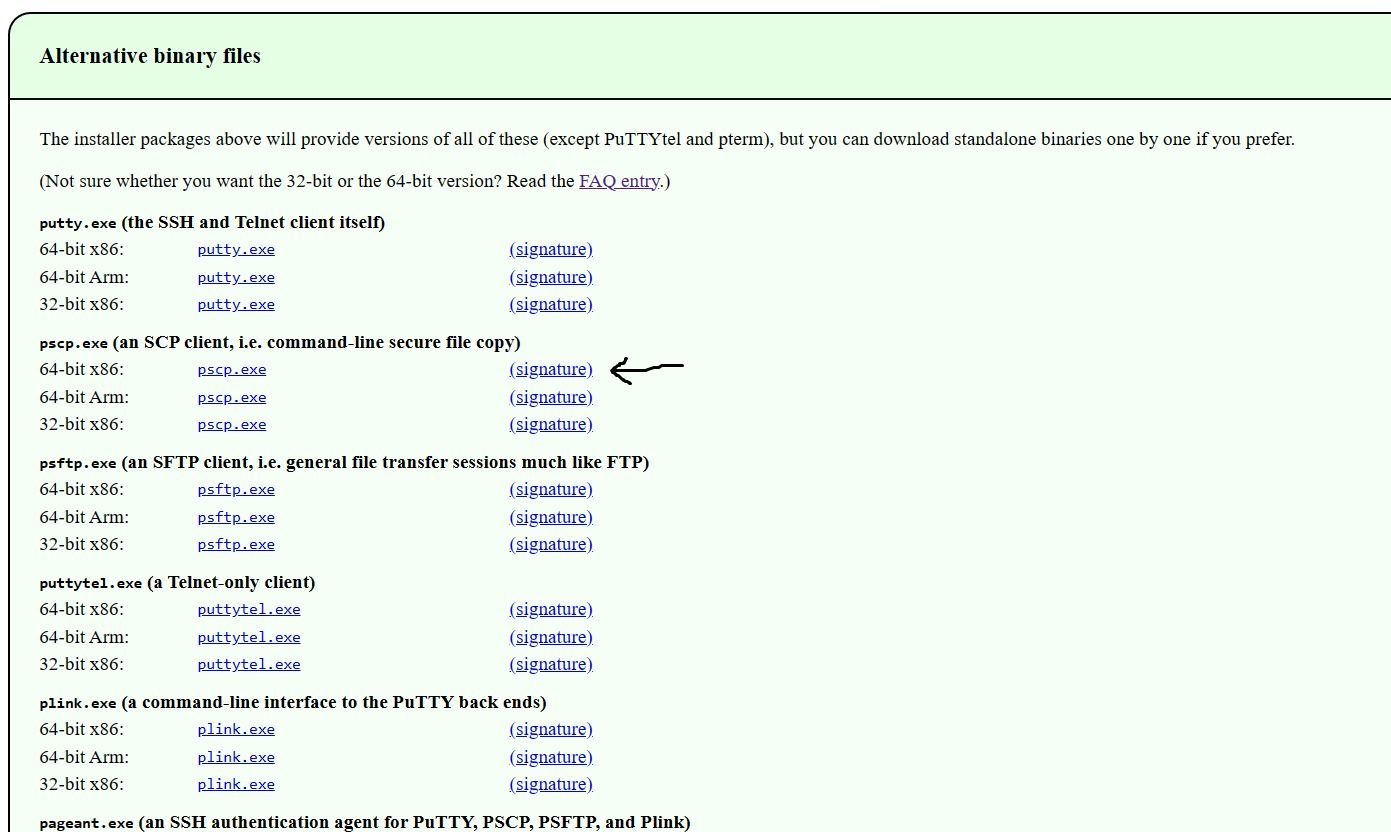

In [1]:
from IPython.display import Image
Image('images/image04.jpg', width =700)

+ After downloading the file, we need to put the pscp file in the same folder as the terminal we used for Hadoop which is PuTTY folder in the computer. Then, we use command prompt to put the dataset for flight data 2007 with other related files into PuTTY.

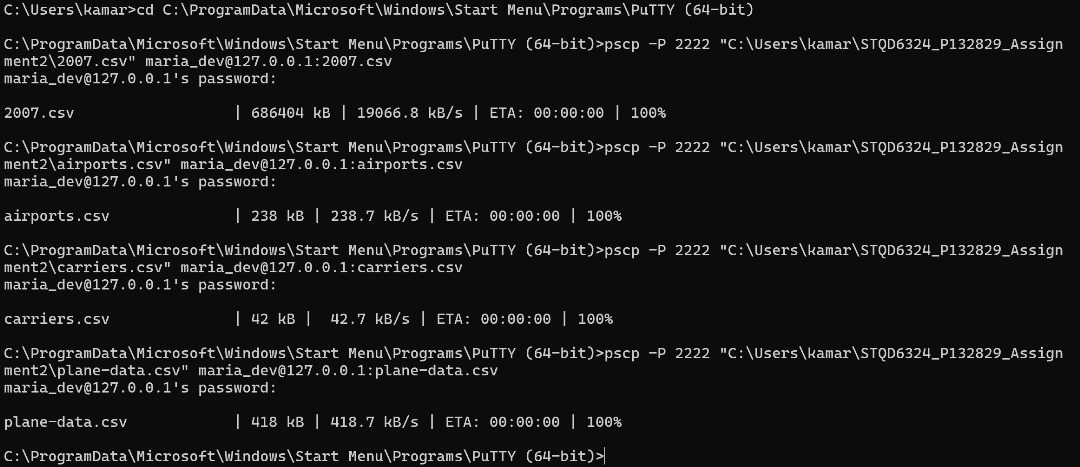

In [2]:
Image('images/image01.jpg', width =700)

+ Then we need to upload the files to Hadoop file system by using PuTTY.

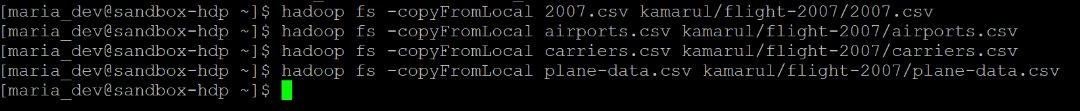

In [3]:
Image('images/image02.jpg', width =700)

+ After we uploaded the files to Hadoop file system, we need to check in AMBARI to make sure that the files is uploaded succesfully.

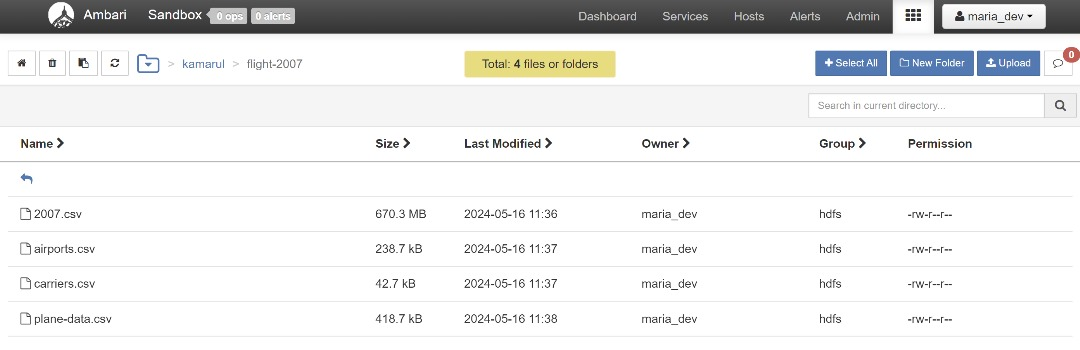

In [4]:
Image('images/image03.jpg', width =700)

### Importing files to HIVE

The next step after succesfully uploaded the files to Hadoop file system, we will import the files to HIVE. We need to create a database name "flight_data_db" to store all the files using HIVE Query Editor.Then check to make sure all the files are succesfully stored in the flight_data_db database.

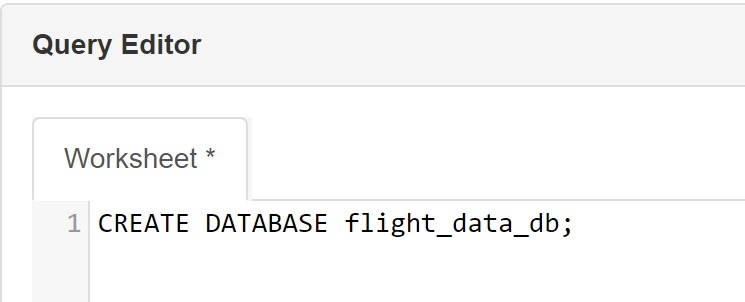

In [5]:
Image('images/image05.jpg', width =300)

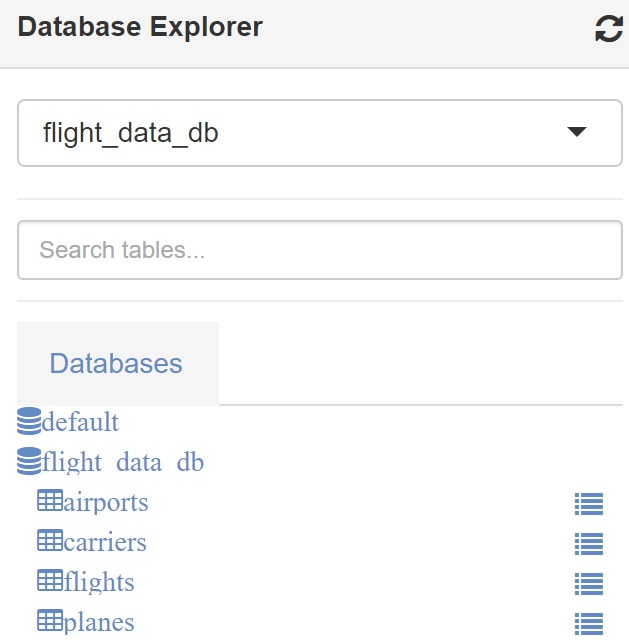

In [6]:
Image('images/image06.jpg', width =300)

## Challenges

### 1. The optimal times of the day, days of the week and times of the year

+ To get the optimal times of the day, days of the week and times of the year using HIVE, we need to identify the average minutes for each days, week and month of the flight data. The average data for each variables can be taken as the optimal value for day, week and year.

+ For this purpose, we need to run a different query for each day, week and year in HIVE query editor. The first query is to get the average times of the day using HIVE.

### a) Optimal times of day

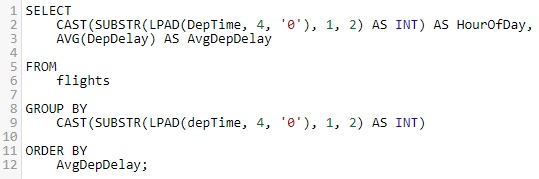

In [7]:
Image('images/image07.jpg', width = 450)

+ After executing the query, the result can be downloaded in csv file for analysis in PyThon.

In [8]:
import pandas as pd

# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/HourOfDay.csv")
data

,hourofday,avgdepdelay
0,5,-3.891087
1,6,-1.092508
2,7,1.067356
3,8,2.704111
4,9,4.901142
5,10,6.599912
6,4,7.005191
7,11,7.226812
8,12,8.534415
9,13,9.629388


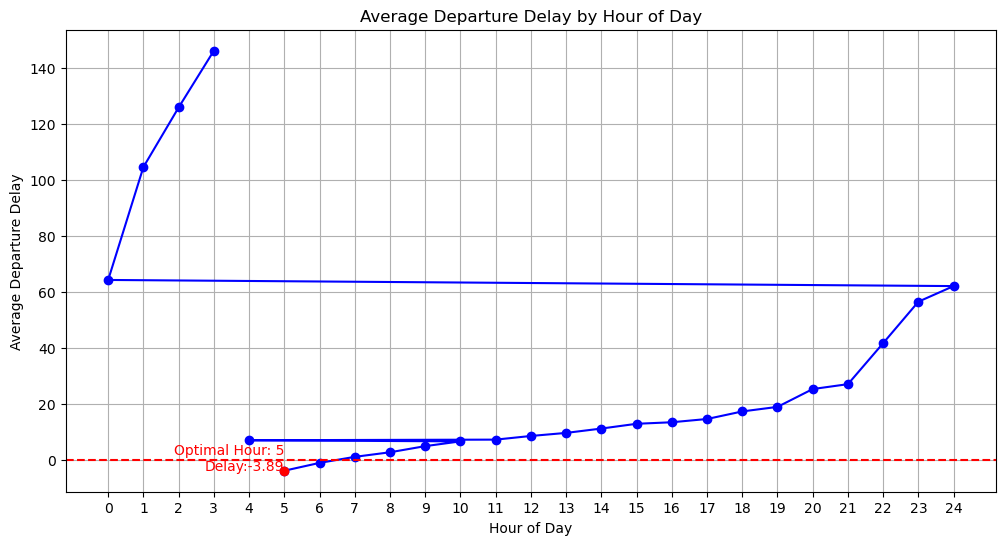

In [9]:
import matplotlib.pyplot as plt

# plotting the average departure delay by hour of the day
plt.figure(figsize = (12, 6))
plt.plot(data['hourofday'], data['avgdepdelay'],
         marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Hour of Day')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay by Hour of Day')
plt.grid(True)
plt.xticks(data['hourofday'])
plt.axhline(y = 0, color = 'r', linestyle = '--')

# highlighting the optimal value
optimal_idx = data['avgdepdelay'].idxmin()
optimal_hour = data.loc[optimal_idx, 'hourofday']
optimal_delay = data.loc[optimal_idx, 'avgdepdelay']

plt.scatter(optimal_hour, optimal_delay, color = 'red', zorder = 5)
plt.text(optimal_hour, optimal_delay, f'Optimal Hour: {optimal_hour}\nDelay:{optimal_delay:.2f}',
        horizontalalignment = 'right', color = 'red')
plt.show()

+ The figure shows the average departure for each hour of the day with the optimal hour highlighted in red. The optimal hour, which corresponds to the minimum average departure delay is clearly marked along with the exact value of the delay. This indicates the best time to schedule departures to minimize delays.
+ The early morning hours, particularly around 5am, show negative average departure delays, meaning flights tend to depart earlier than scheduled. This might be due to less air traffic and fewer operational constraints.
+ For mid morning and afternoons, the average departure delays increase, peaking around 9am to 11am. This could be due to the accumulation of delays from earlier flights and increased air traffic.
+ Delays tend to decrease again in the late evening hours, suggesting a slight recovery as air traffic reduces towards the end of the day. Airlines and passengers can use this information to strategically schedule their flights. For instance, choosing flights in the morning can minimize the risk of departure delays.

### b) Optimal days of the week

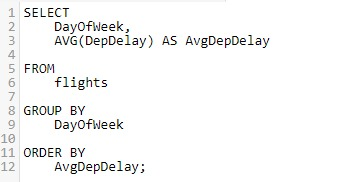

In [10]:
Image('images/image08.jpg', width = 300)

In [11]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/DayofWeek.csv")
data

,dayofweek,avgdepdelay
0,6,8.993705
1,2,9.398721
2,3,10.687133
3,1,11.892416
4,7,11.978119
5,4,12.886387
6,5,13.576725


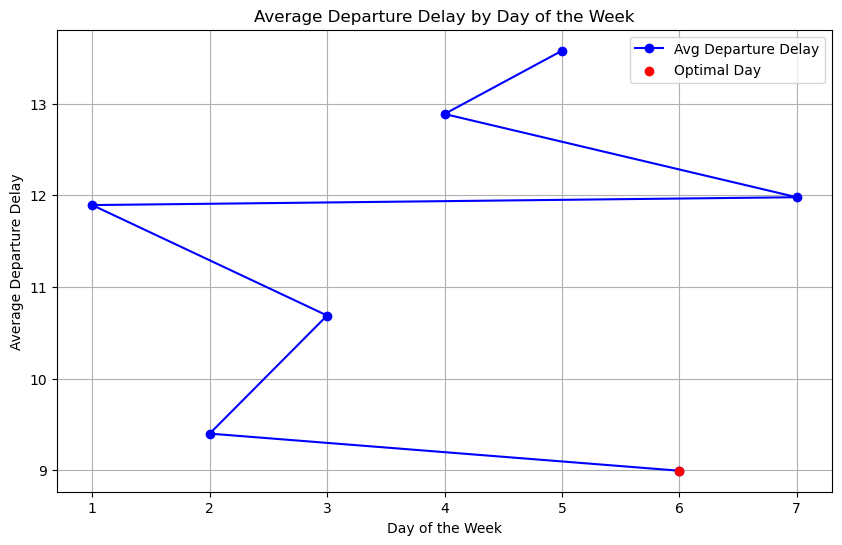

In [12]:
# finding the optimal value
optimal_day = data.loc[data['avgdepdelay'].idxmin()]

# plotting the dataset
plt.figure(figsize = (10, 6))
plt.plot(data['dayofweek'], data['avgdepdelay'],
        marker = 'o', linestyle = '-', color = 'b',
        label = 'Avg Departure Delay')
plt.scatter(optimal_day['dayofweek'], optimal_day['avgdepdelay'],
           color = 'r', zorder = 5, label = 'Optimal Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay by Day of the Week')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 8))

plt.show()

+ The figure represents the average departure delay by day of the week, with the optimal day which is the day with the minimum average departure delay highlighted in red.
+ According to the dataset, the optimal day for lowest delay is number 6 which typically represents Saturday. This suggests that flight on Saturday tend to experience the least average delay.
+ There is a noticeable trend in the average departure delays across different days of the week. Delays tend to be lower towards the end of the week, particularly on weekends, with Saturday showing the minimum delay.
+ The midweek days, such as Tuesday(value 2) and Wednesday(value 3) show moderate average delays, higher than the weekends but lower than the start of the week. For travelers looking to minimize their risk of flight delays, scheduling flights on Saturday might be the best option and avoiding flights on Sunday and Monday.

### c) Optimal times of the year

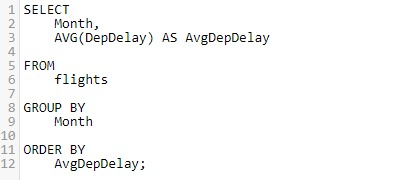

In [13]:
Image('images/image09.jpg', width = 400)

In [14]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/MonthOfYear.csv")
data

,month,avgdepdelay
0,9,6.157686
1,11,7.446888
2,10,7.973724
3,5,8.329205
4,4,10.077714
5,1,10.286743
6,3,11.836803
7,8,13.515876
8,2,14.022531
9,7,14.802614


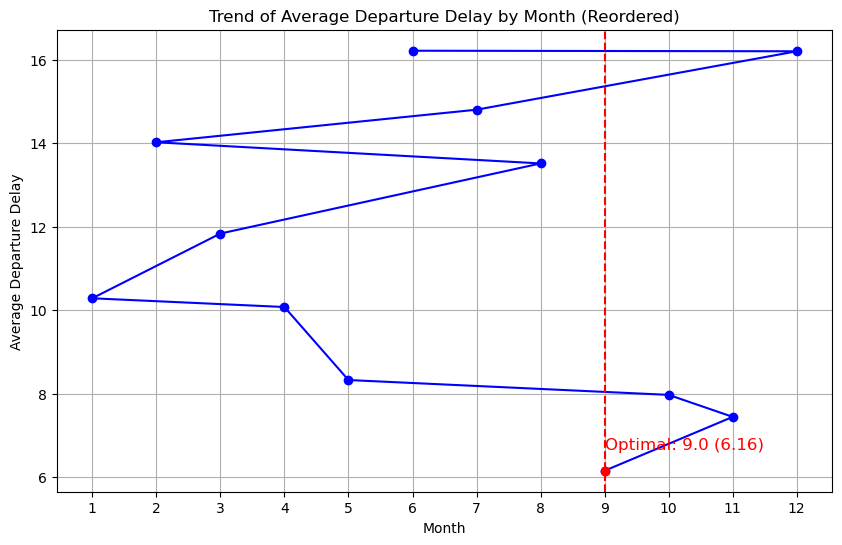

In [15]:
# Optimal month
optimal_month = data.loc[data['avgdepdelay'].idxmin()]

# Plotting the optimal value
plt.figure(figsize=(10, 6))
plt.plot(data['month'], data['avgdepdelay'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay')
plt.title('Trend of Average Departure Delay by Month (Reordered)')

# Highlighting the optimal month
plt.axvline(x=optimal_month['month'], color='r', linestyle='--')
plt.scatter(optimal_month['month'], optimal_month['avgdepdelay'], color='red', zorder=5)
plt.text(optimal_month['month'], optimal_month['avgdepdelay'] + 0.5, 
         f'Optimal: {optimal_month["month"]} ({optimal_month["avgdepdelay"]:.2f})', 
         color='r', fontsize=12)

plt.grid(True)
plt.xticks(data['month']) 
plt.show()

+ The trend chart highlighted adn pinpoint the optimal value, showing the month with the lowest average departure delay which is September with a red dot and vertical dashed line. The month of September is the lowest average departure with an average delay of approximately 6.16 minutes. This makes September the optimal month of the year for minimizing the departure delays.
+ This figure also shows that April (value 4) and June (value 6) exhibit higher average departure delays compared to other months with around 10.08 and 8.33 minutes. This could be considered periods where delays are more likely to be happen in the year. This may also be attributed to factors like weather conditions or increased travel during these periods.
+ The winter months from December to February have moderate to high average delays with December having slightly higher delays than January and February.
+ This chart indicates variability in departure delays throughout the year with no single month consistently having the highest or lowest delays except for the identified optimal month.

### 2. The primary factors contributing to flight delays

+ The primary factors contributing to flight delays may come from variety of reasons. Based on the dataset, we can choose certain variables to determine all those primary factors contributing to flight delays in year 2007.
+ We can use these 5 variables that indicates the minutes of delay by carriers, weather, National Air System (NAS), security and late aircraft. To determine the primary factors contributing to flight delays using HIVE query, we can start by analyzing the average delays contributed by different factors such as carrier delays, weather delays, NAS delays, security delays and late aircraft delays. We also need to filter and process the data to ensure we are only considering relevant flight which is non-cancelled and non-diverted flights.

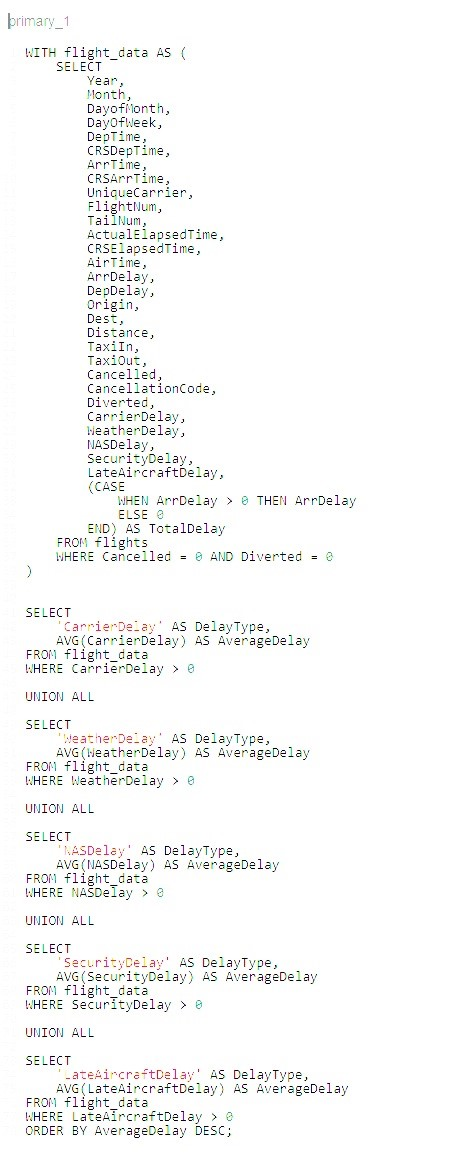

In [19]:
Image('images/image10.jpg', width = 400)

In [31]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/PrimaryCode.csv")
data

,_u1.delaytype,_u1.averagedelay
0,LateAircraftDelay,45.319565
1,WeatherDelay,44.893969
2,CarrierDelay,35.351155
3,NASDelay,27.005561
4,SecurityDelay,19.085770


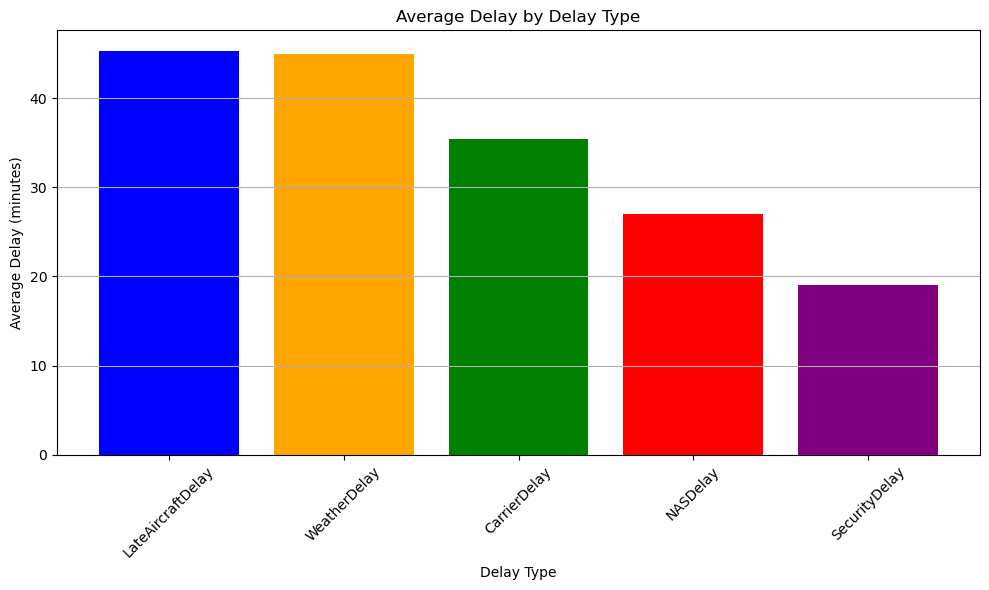

In [32]:
# rename columns
data.columns = ['DelayType', 'AverageDelay']

# plotting the data
plt.figure(figsize = (10, 6))
plt.bar(data['DelayType'], data['AverageDelay'],
       color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Delay Type')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')

plt.tight_layout()
plt.show()

+ The bar chart shows the comparison of the average delay by delay type. It shows the average delays caused by different factors such as Late Aircraft Delay, Weather Delay, Carrier Delay, NAS Delay and Security Delay.
+ Late air craft delay contribute the most to flight delays with average of 45.32 minutes. This could be due to various operational issues such as delayed turnaround times, maintenance issues or delays from previous flights. The second most significant factor is weather delays with average delay of 44.89 minutes. These delays are typically beyond the control of airlines and can be caused by adverse weather conditions such as storms, fog or snow, affecting both departure and arrival.
+ The third most significant factor is Carrier delay with average delay of 35.35 minutes. This may due to factors within the airline's control, such as crew unavailability, baggage loading issues or operational inefficiencies. Then, followed by NAS delay with average delay of 27.01 minutes. This factor could be due to delays caused by national air traffic system including air traffic control delays, airport operations, heavy traffic volumes and airspace congestion.
+ The least significant factors is Security delay with average delay of 19.09 minutes although still contribute a substantial amount of overall delays. These can be due to heightened security measures, passenger screening or security breaches. For conclusion, the primary delay factors are Late Aircraft and Weather delays, indicating a significant impact from factors that are often beyond immediate control.

### 3. Factors predominantly lead to flight cancellations

+ To determine the factors that predominantly lead to flight cancellations, we need to analyze the cancellation codes and count the number of cancellations for each code. This will help in identifying the primary reasons for flight cancellations. We will only selects relevant columns and filters for flights that were cancelled.

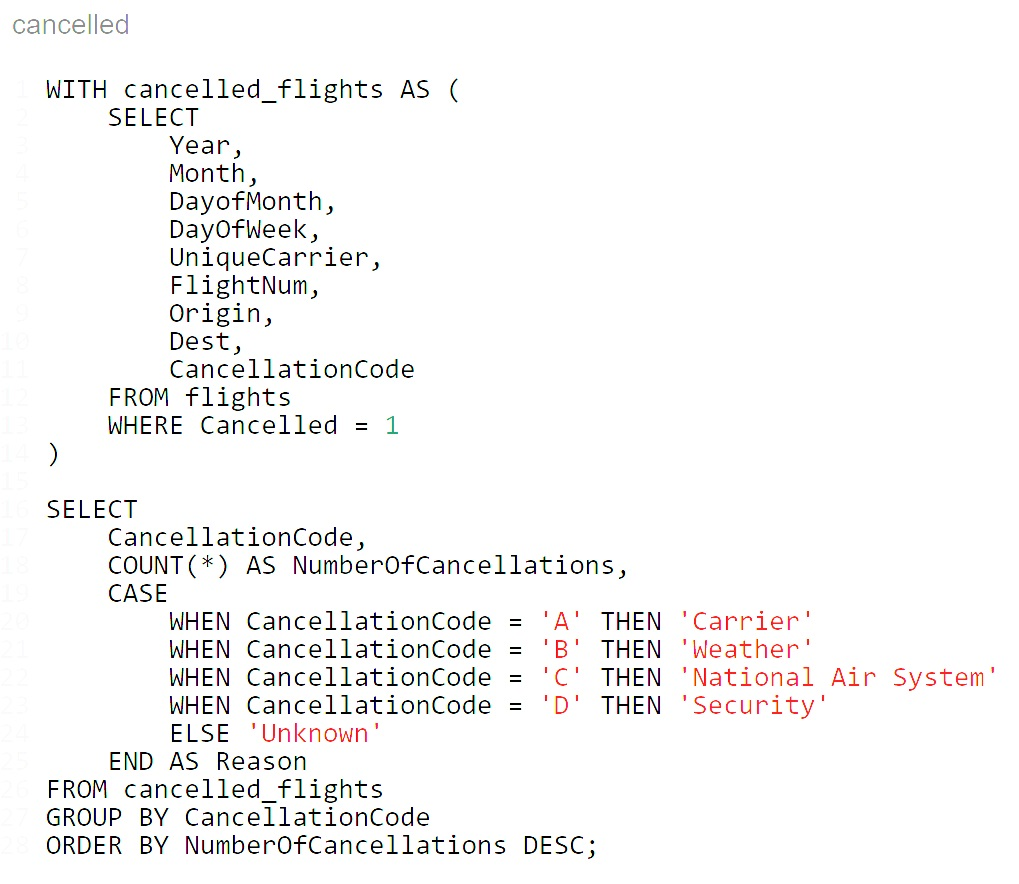

In [25]:
Image('images/image11.jpg', width = 400)

In [33]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/cancelled.csv")
data

,cancellationcode,numberofcancellations,reason
0,A,66779,Carrier
1,B,61935,Weather
2,C,31995,National Air System
3,D,39,Security


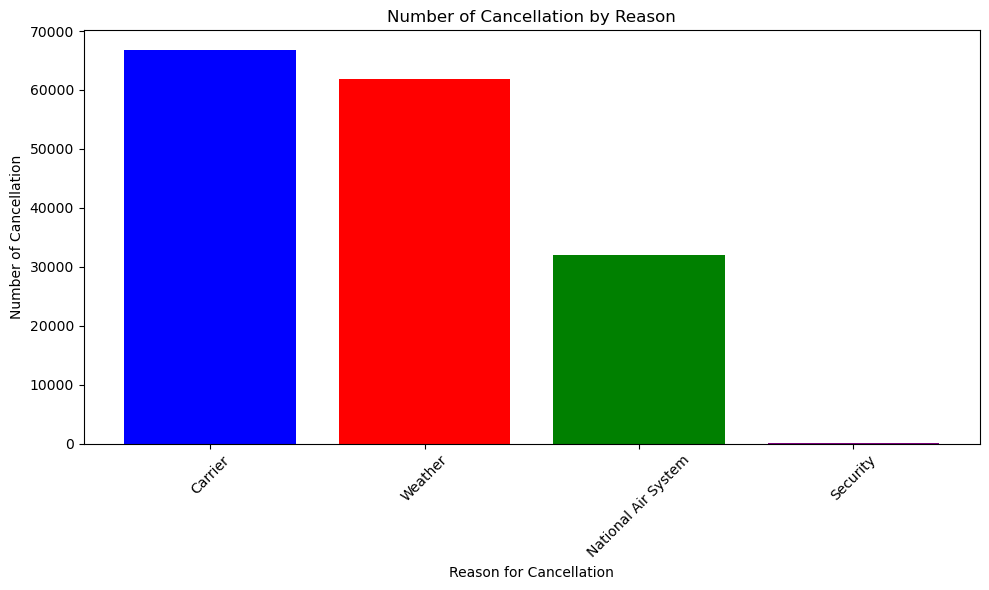

In [34]:
plt.figure(figsize = (10, 6))
plt.bar(data['reason'], data['numberofcancellations'],
       color = ['blue', 'red', 'green', 'purple'])
plt.xlabel('Reason for Cancellation')
plt.ylabel('Number of Cancellation')
plt.title('Number of Cancellation by Reason')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

+ The bar plot shows the number of cancellations by reason of cancellations. Based on plot, it shows that Carrier-related issues are the leading cause of flight cancellation with 66,779 incidents in a year 2007. This factors likely includes operational inefficiencies within the airline such as crew scheduling conflicts, aircraft maintenance problems and other internal logistics. The high number of cancellations suggests that airlines might face significant challenges in managing their resources and operations effectively.
+ Weather is the second most common reason for cancellations with 61,935 incidents in 2007. This may result from various conditions, including severe storms, fog, snow and other adverse weather phenomena. These conditions can impact not only the safety of flights but also airport operations, leading to delays and cancellations.
+ The National Air System (NAS) is responsible for 31,995 cancellations. This issues related to the broader aviation infrastructure, such as air traffic control delays, airport congestion and logistic problems within the national airspace system. The significant number of cancellations indicates that systemic issues in the air traffic and airport management infrastructure can have a considerable impact on flight operations.
+ The least common issues is Security with only 39 incidents in 2007. Although security-related cancellations are relatively rare, they can result from various incidents including security threats, breaches and necessary security measures that require flights to be cancelled to ensure passenger safety.

### 4. Flight that experiences the most frequent and significant delays and cancellations

+ To determine the flight that experienced the most frequent and significant delays and cancellations, we first need to identify the flights with the highest average delays and the most frequent cancellations. We will find flighths with most frequent and significant delays in which we will calculates the average departure and arrival delays for each flight and orders them by the highest average delays.

### a) Flight with most frequent and significant delays

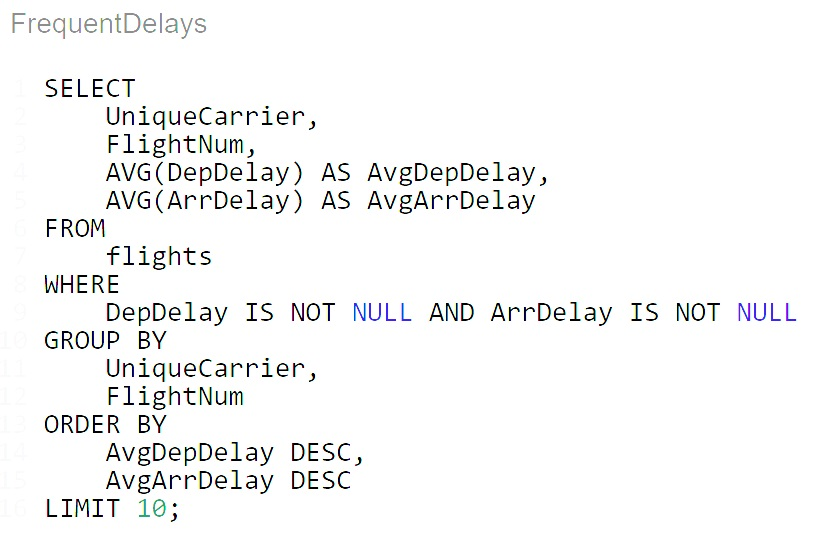

In [35]:
Image('images/image12.jpg', width = 400)

In [36]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/FrequentDelays.csv")
data

,uniquecarrier,flightnum,avgdepdelay,avgarrdelay
0,XE,718,280.0,271.0
1,NW,1329,241.0,236.0
2,B6,9600,238.0,225.0
3,F9,2937,230.0,209.0
4,B6,1805,215.0,212.0
5,AA,187,191.0,171.0
6,XE,719,188.5,192.5
7,NW,1181,157.0,140.0
8,WN,3700,154.5,150.0
9,B6,9510,143.0,122.0


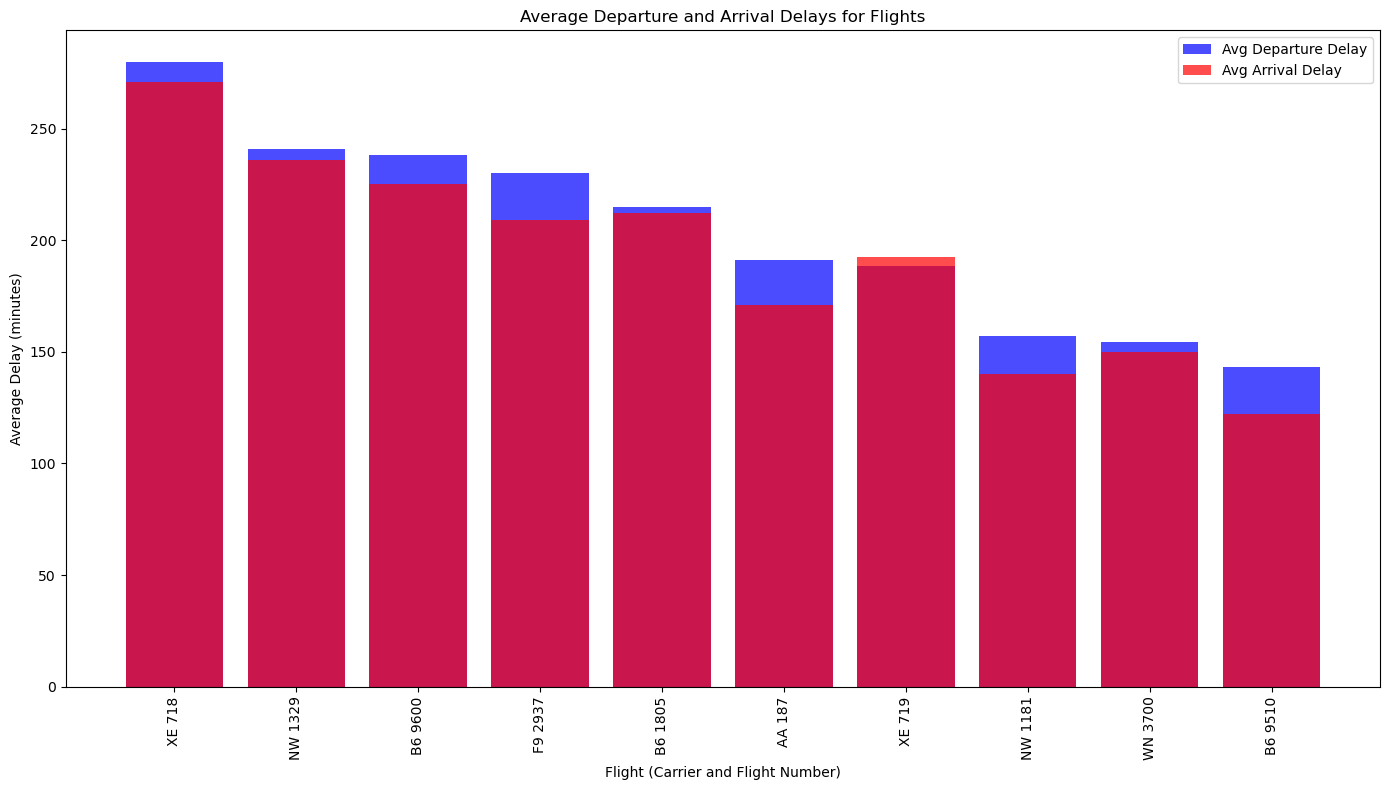

In [37]:
# set the plot size
plt.figure(figsize = (14, 8))

# plot average departure delay
plt.bar(data['uniquecarrier'] + ' ' + data['flightnum'].astype(str),
       data['avgdepdelay'], color = 'blue', alpha = 0.7,
       label = 'Avg Departure Delay')

# plot average arrivel delay
plt.bar(data['uniquecarrier'] + ' ' + data['flightnum'].astype(str),
       data['avgarrdelay'], color = 'red', alpha = 0.7,
       label = 'Avg Arrival Delay')

# Add label and title
plt.xlabel('Flight (Carrier and Flight Number)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure and Arrival Delays for Flights')
plt.xticks(rotation = 90)
plt.legend()

plt.tight_layout()
plt.show()

+ The bar chart shows the comparison of the average departure and arrival delays for each flights. Each flight is represented by its carrier code and flight number. The blue bars indicate the average departure delays, and the red bars indicate the average arrival delays.
+ The flights with most significant delays is flight XE 718. This flight has the highest average delays with both departure and arrival delays being significantly high in which 280 minutes departure delay and 271 minutes arrival delay. The other three flight with most significant delays are flight NW 1329, B6 9600 and F9 2937.
+ For most flight, the average departure delay is slightly higher than the average arrival delay. This suggests that some flights manage to make up a bit of time during the flight  despite having significant departure delays.
+ Airlines with frequent delays are both from XE (ExpressJet Airlines) and NW (Northwest Airlines) that prominently featured among those with the highest delays. B6 (JetBlur Airways) airlines also appears multiple times with significant delays.
+ In summary, flights XE 718, NW 1329 and B6 9600 experiene the most significant delays in both departure and arrival times. Those airlines have multiple flights with substantial delays, indicating potential operational issues or external factors affecting their punctuality.

### b) Flight with most frequent cancellations

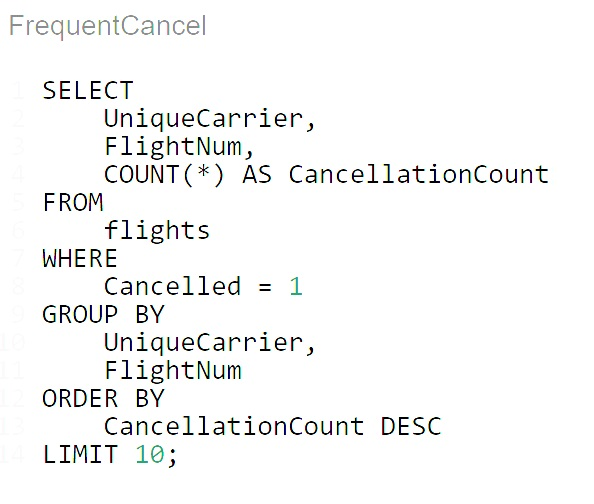

In [39]:
Image('images/image13.jpg', width = 300)

In [40]:
# load the dataset downloaded from HIVE
data = pd.read_csv("C:/Users/kamar/STQD6324_P132829_Assignment2/FrequentCancel.csv")
data

,uniquecarrier,flightnum,cancellationcount
0,XE,2491,110
1,YV,7205,109
2,XE,2410,106
3,XE,2864,94
4,XE,3127,85
5,XE,2517,80
6,YV,7308,80
7,XE,1280,79
8,XE,2741,76
9,XE,1279,76


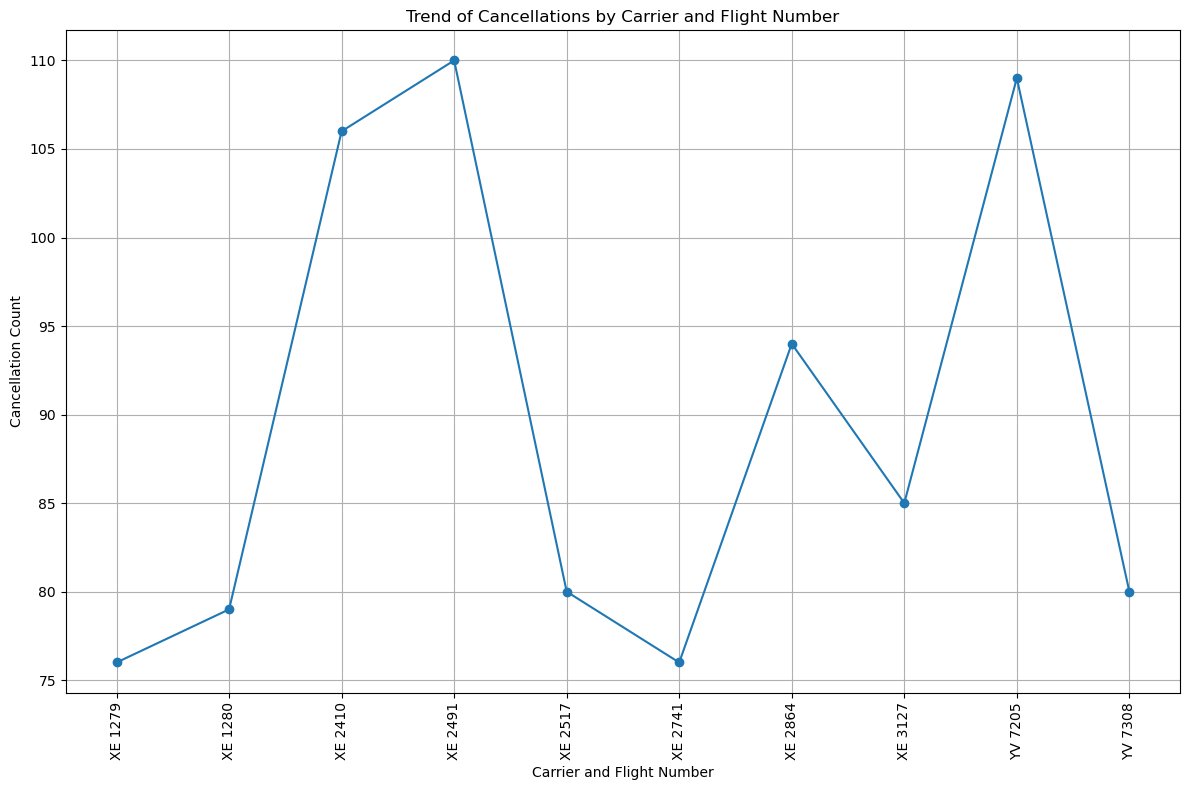

In [41]:
# generate new column
data['carrier_flight'] = data['uniquecarrier'] + ' ' + data['flightnum'].astype(str)

# sort the dataframe
data_sorted = data.sort_values(by = ['uniquecarrier', 'flightnum'])

# plotting the data
plt.figure(figsize = (12, 8))
plt.plot(data_sorted['carrier_flight'], data_sorted['cancellationcount'], marker = 'o')
plt.title('Trend of Cancellations by Carrier and Flight Number')
plt.xlabel('Carrier and Flight Number')
plt.ylabel('Cancellation Count')
plt.xticks(rotation = 90)
plt.grid(True)
plt.tight_layout()

plt.show()

+ Based on the trend plot, it shows that the flight the highest cancellation count in the dataset is XE 2491 with 110 cancellations. Carriers like XE and YV have multiple flights with high cancellation counts compared to other carriers. XE, in particular, appears frequently in the top cancellation counts.
+ This same carrier XE, also experienced the highest departure and arrival delays in most of its flight throughout 2007. It appears that carrier XE have both flight that experienced most frequent and significant delays and cancellations.